# Human Activity Recognition

This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

#### How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

    

#### The dataset includes the following files:

- 'README.txt'

- 'features_info.txt': Shows information about the variables used on the feature vector.

- 'features.txt': List of all features.

- 'activity_labels.txt': Links the class labels with their activity name.

- 'train/X_train.txt': Training set.

- 'train/y_train.txt': Training labels.

- 'test/X_test.txt': Test set.

- 'test/y_test.txt': Test labels.

The following files are available for the train and test data. Their descriptions are equivalent. 

- 'train/subject_train.txt': Each row identifies the subject who performed the activity for each window sample. Its range is from 1 to 30. 

- 'train/Inertial Signals/total_acc_x_train.txt': The acceleration signal from the smartphone accelerometer X axis in standard gravity units 'g'. Every row shows a 128 element vector. The same description applies for the 'total_acc_x_train.txt' and 'total_acc_z_train.txt' files for the Y and Z axis. 

- 'train/Inertial Signals/body_acc_x_train.txt': The body acceleration signal obtained by subtracting the gravity from the total acceleration. 

- 'train/Inertial Signals/body_gyro_x_train.txt': The angular velocity vector measured by the gyroscope for each 

### Overview of the Dataset

* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities ( also Y_label )

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.
    
    
* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

Checkout Human Activity Recognition README ( present in the same directory ) <br><br>

In [1]:
import os

os.chdir('E:\Datasets\Human Activity Recognition')

In [2]:
import pandas as pd
import numpy as np

Sample Data in features.txt

1 tBodyAcc-mean()-X <br>
2 tBodyAcc-mean()-Y <br>
3 tBodyAcc-mean()-Z<br>
4 tBodyAcc-std()-X<br>
5 tBodyAcc-std()-Y<br>
6 tBodyAcc-std()-Z<br>
7 tBodyAcc-mad()-X<br>

In [3]:
# Get the features from the file features.txt

feat = [] # will contain all features

with open('features.txt') as f:
    
    feat = [ line.split()[1] for line in f.readlines() ]
    
print(' No of Features : ',len(feat) )

# for line in f.readlines() : iterate over each line in the .txt file
# line.split()[1] : split the content of the line and take the 2nd occurence

 No of Features :  561


 ## Train Data
 
 Sample Data in X_train.txt
 
 2.8858451e-001 -2.0294171e-002 -1.3290514e-001 -9.9527860e-001 -9.8311061e-001 -9.1352645e-001 -9.9511208e-001  <br>
 -9.8318457e-001 -9.2352702e-001 -9.3472378e-001 -5.6737807e-001 -7.4441253e-001  8.5294738e-001  6.8584458e-001  <br>
 8.1426278e-001 -9.6552279e-001 -9.9994465e-001 -9.9986303e-001 -9.9461218e-001 -9.9423081e-001 -9.8761392e-001  <br>

In [4]:
# Getting Train Data

xtr = pd.read_csv( 'train/X_train.txt', delim_whitespace=True, header=None, names=feat )

# Adding subject ( who performed the activity for each window sample ) column to the xtr

xtr['subject'] = pd.read_csv('train/subject_train.txt', header=None, squeeze=True)

# delim_whitespace : bool, default False Specifies whether or not whitespace (e.g. ' ' or '    ') will be used as the sep. 
# squeeze : bool, default False If the parsed data only contains one column then return a Series.

In [5]:
xtr.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1


In [6]:
# Getting the label data

ytr = pd.read_csv('train/y_train.txt', names=['Activity'], squeeze=True)

ytrlabel = ytr.map({1: 'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING'})

# names : array-like, optional List of column names to use. 
# If file contains no header row, then you should explicitly pass header=None. 

In [7]:
# Putting all columns in a single dataframe

xtr['Activity'] = ytr
xtr['ActivityName'] = ytrlabel

xtr.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING


## Test Data

In [8]:
xte = pd.read_csv('test/X_test.txt', delim_whitespace=True, header=None, names=feat )

xte['subject'] = pd.read_csv('test/subject_test.txt', header=None, squeeze=True)

yte = pd.read_csv('test/y_test.txt', names=['Activity'], squeeze=True)
ytelabel = yte.map({ 1:'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING' })


xte['Activity'] = yte
xte['ActivityName'] = ytelabel
xte.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.16292,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.01750,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING


In [9]:
print( xtr.shape )
print( xte.shape )

(7352, 564)
(2947, 564)


### Finding duplicates and NULL values

In [10]:
# Checking for Duplicates

print( sum( xtr.duplicated() ) )
print( sum( xte.duplicated() ) )

# duplicated() : Return boolean Series denoting duplicate rows, optionally only considering certain columns.

0
0


In [11]:
xtr[ xtr.isnull().any(axis=1) ] 
# sometimes it fails to return value like null

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName


In [12]:
# Checking for NULL Values

print( xtr.isnull().values.sum() )
print( xte.isnull().values.sum() )

0
0


### Cleaning Column names

In [13]:
xtr.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

In [14]:
# Removing '()' '-' ',' from column names

cols = xtr.columns

cols = cols.str.replace('[()]','')
cols = cols.str.replace('[-]', '')
cols = cols.str.replace('[,]','')

xtr.columns = cols
xte.columns = cols

xtr.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

### Checking for Class imbalance

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

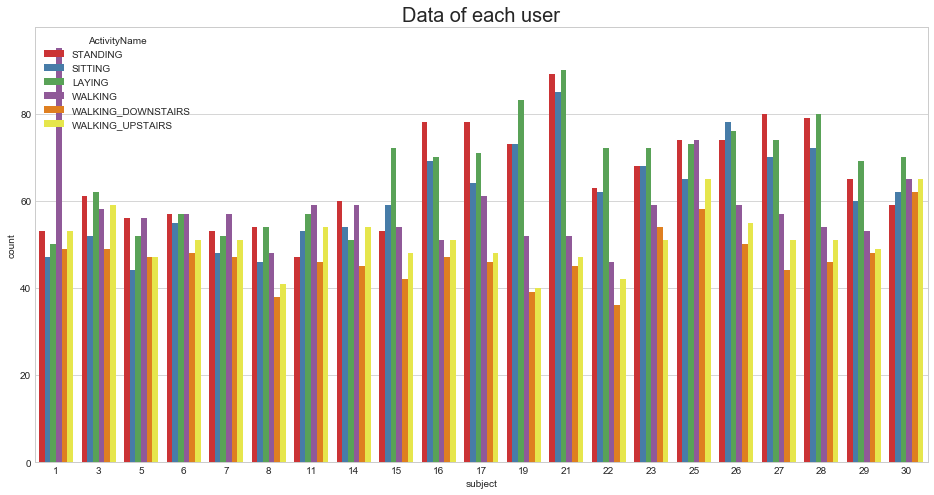

In [16]:
sns.set_style('whitegrid')
#plt.rcParams['font.family'] = 'Dejavu Sans'

plt.figure( figsize=(16,8) )
plt.title('Data of each user', fontsize=20)

sns.countplot( x = 'subject', hue = 'ActivityName', data = xtr, palette="Set1" )
plt.show()

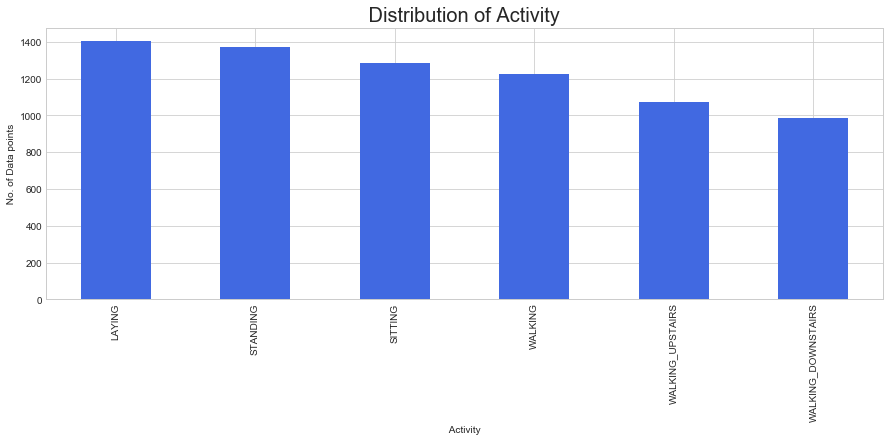

In [17]:
xtr['ActivityName'].value_counts().plot(kind = 'bar', figsize = (15,5), color='royalblue' )
plt.title(' Distribution of Activity ', fontsize=20 )
plt.xlabel(' Activity ',fontsize=10 )
plt.ylabel(' No. of Data points ',fontsize=10 )
plt.show()

All subjects display the same readings from the plot named Data of each user

Through the plot Distribution of Activity we can see that Our Class label seems to be Balanced

## Exploratory Data Analysis

<br>
We break down our Activities into two broad activities :
- Static Activities ( Sitting Down, Lying Down, Standing etc ) here there is no motion so motion info won't be useful here
- Dynamic Activities ( Walking, Walking Upstairs, Walking Downstairs etc ) here motion info will be useful
<br><br>
"___Without domain knowledge EDA has no meaning, without EDA a problem has no soul.___" <br><br>

For distiguishing Static vs Dynamic Avtivities we'd need Acceleration realted signals  
One such column is ' tBodyAccMagmean ' 

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


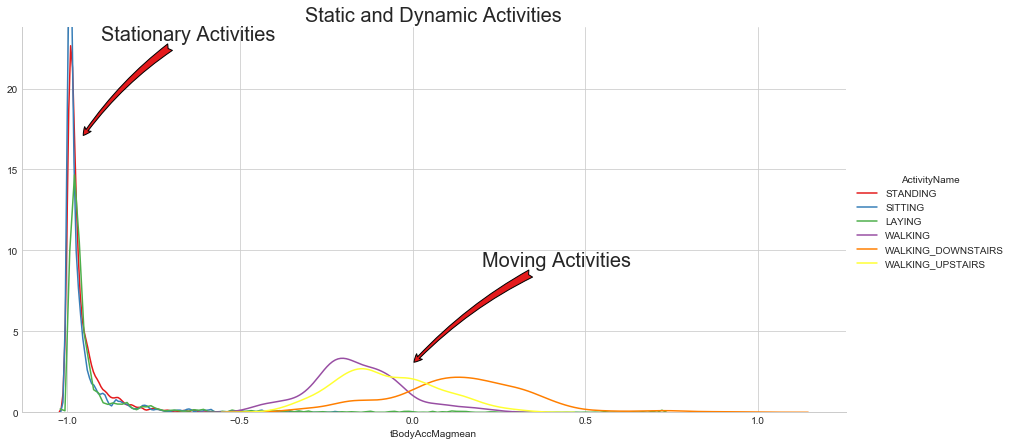

In [18]:
sns.set_palette("Set1")

facetgrid = sns.FacetGrid( xtr, hue='ActivityName', size=6, aspect=2 )
facetgrid.map( sns.distplot,'tBodyAccMagmean', hist=False ).add_legend()

plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            arrowprops = dict( arrowstyle="fancy", connectionstyle="arc3,rad=0.1" ))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            arrowprops = dict( arrowstyle="fancy", connectionstyle="arc3,rad=0.1" ))

plt.title('Static and Dynamic Activities',fontsize=20)
plt.show()


# rrowprops : dict, optional The properties used to draw a FancyArrowPatch arrow between the positions xy and xytext.

There is a clear seperation between Stationary and Moving Activities

We should observe them closely

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


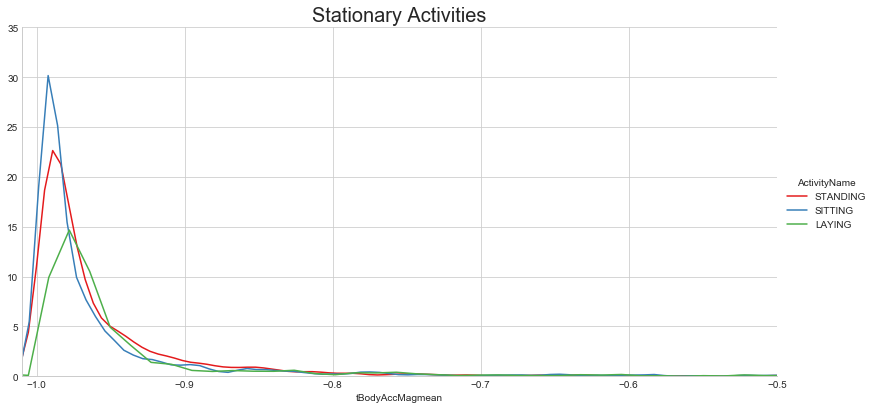

In [19]:
# Stationary Activities Up CLose
df1 = xtr[ xtr['Activity'] >= 4 ]

facetgrid = sns.FacetGrid( df1, hue='ActivityName', size=5.5, aspect=2 )
facetgrid.map( sns.distplot,'tBodyAccMagmean', hist=False ).add_legend()

plt.axis([-1.01, -0.5, 0, 35])  # we give an axis by ourself to increase Spacing

plt.title('Stationary Activities',fontsize=20)
plt.show()

# plt.axis() : Convenience method to get or set some axis properties.
# axis( xmin, ymin, xmax, ymax ) : float, optional
# The axis limits to be set. Either none or all of the limits must be given.

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


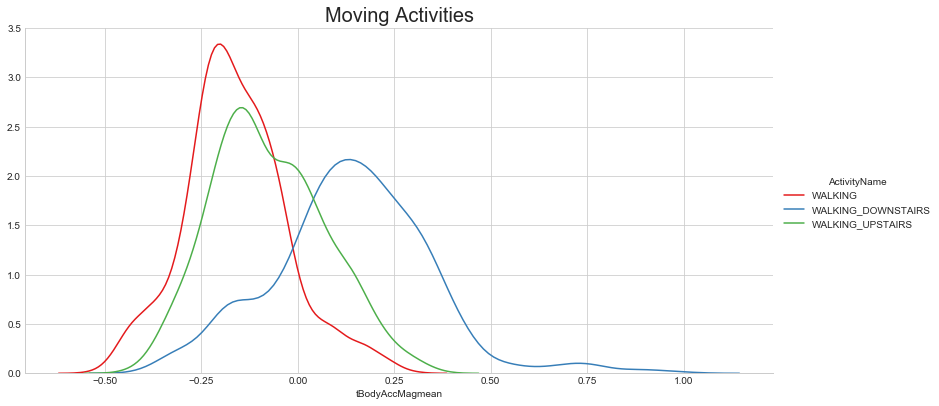

In [20]:
df2 = xtr[ xtr['Activity'] < 4 ]

facetgrid = sns.FacetGrid( df2, hue='ActivityName', size=5.5, aspect=2 )
facetgrid.map( sns.distplot,'tBodyAccMagmean', hist=False ).add_legend()

plt.title('Moving Activities',fontsize=20)
plt.show()

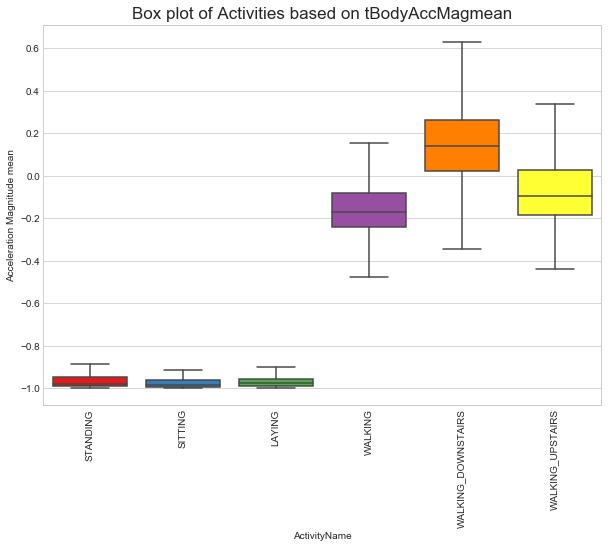

In [21]:
plt.figure(figsize=(10,7))

sns.boxplot( x='ActivityName', y='tBodyAccMagmean', data=xtr, showfliers=False, saturation=1 )

plt.ylabel('Acceleration Magnitude mean')
plt.xticks(rotation=90) # for rotating labels on X axis 
plt.title('Box plot of Activities based on tBodyAccMagmean',fontsize=17)
plt.show()

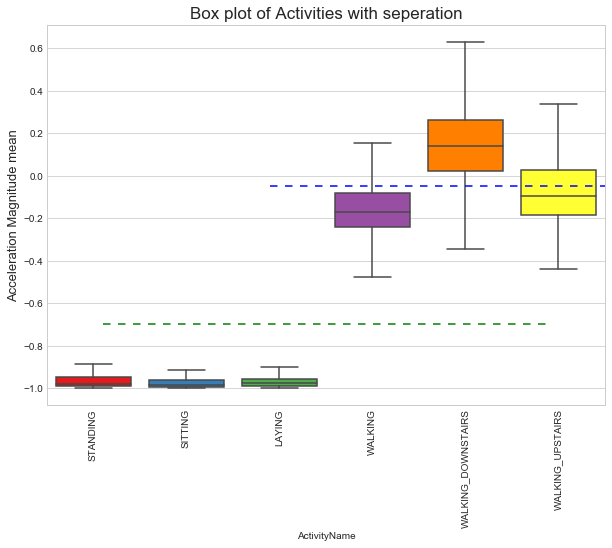

In [22]:
plt.figure(figsize=(10,7))

sns.boxplot( x='ActivityName', y='tBodyAccMagmean', data=xtr, showfliers=False, saturation=1)

plt.axhline(y=-0.7, xmin=0.1, xmax=0.9, dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='b')

plt.title('Box plot of Activities with seperation',fontsize=17)
plt.ylabel('Acceleration Magnitude mean',fontsize=13)
plt.xticks(rotation=90)

plt.show()

# axhline() : Add a horizontal line across the axis. axhline( y=0, xmin=0, xmax=1, **kwargs )
# y : scalar, optional, default: 0 => y position in data coordinates of the horizontal line.
# xmin : scalar, optional, default: 0 => Should be bw 0 and 1, 0 being far left of plot, 1 far right.
# xmax : scalar, optional, default: 1 => Should be bw 0 and 1, 0 being far left of plot, 1 far right .


We can see in the 1st box plot that there is a clear seperation between Stationary and Moving Activities

The Green dotted line seperates Stationary and Moving Activities

And also there appears be a seperation between Walking Downstairs and Walking, Walking Upstairs

The Blue dotted line seperates Walking Downstairs and Walking, Walking Upstairs

We can conclude from the above observations that :

- If tBodyAccMagmean is < -0.7 the Activities are either Standing or Sitting or Laying.
- If tBodyAccMagmean is > -0.6 the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tBodyAccMagmean > 0.0 the Activity is WalkingDownstairs.

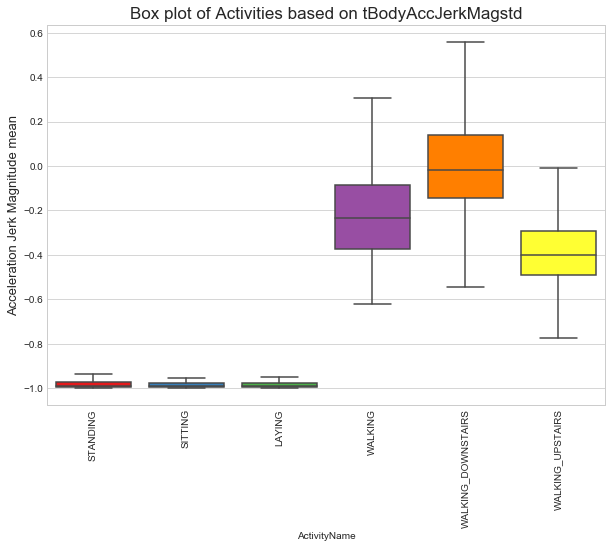

In [23]:
plt.figure(figsize=(10,7))

sns.boxplot( x='ActivityName', y='tBodyAccJerkMagstd', data=xtr, showfliers=False, saturation=1 )

plt.ylabel('Acceleration Jerk Magnitude mean',fontsize=13)
plt.xticks(rotation=90) # for rotating labels on X axis 
plt.title('Box plot of Activities based on tBodyAccJerkMagstd',fontsize=17)
plt.show()

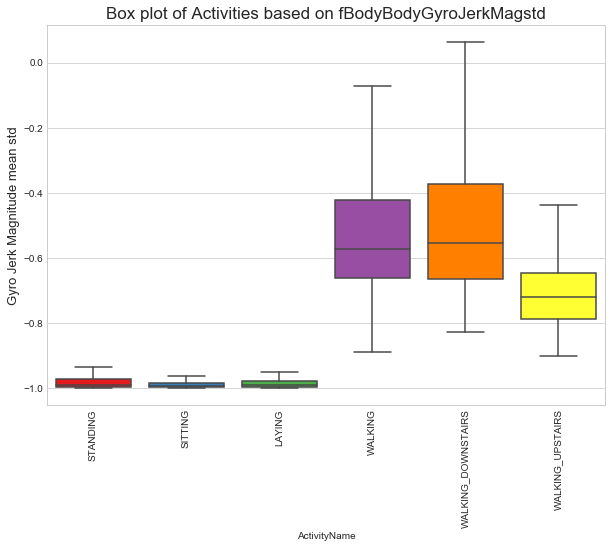

In [24]:
plt.figure(figsize=(10,7))

sns.boxplot( x='ActivityName', y='fBodyBodyGyroJerkMagstd', data=xtr, showfliers=False, saturation=1 )

plt.ylabel('Gyro Jerk Magnitude mean std',fontsize=13)
plt.xticks(rotation=90) # for rotating labels on X axis 
plt.title('Box plot of Activities based on fBodyBodyGyroJerkMagstd',fontsize=17)
plt.show()

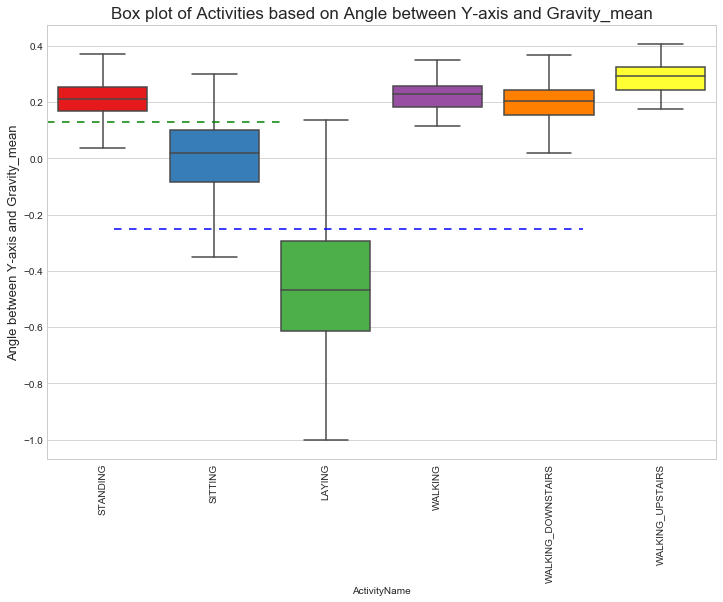

In [25]:
plt.figure(figsize=(12,8))

sns.boxplot( x='ActivityName', y='angleYgravityMean', data=xtr, showfliers=False, saturation=1 )

plt.axhline(y=0.13, xmin=0, xmax=0.35, dashes=(5,5), c='g')
plt.axhline(y=-0.25, xmin=0.1, xmax=0.8, dashes=(5,5), c='b')

plt.ylabel('Angle between Y-axis and Gravity_mean',fontsize=13)
plt.xticks(rotation=90) # for rotating labels on X axis 
plt.title('Box plot of Activities based on Angle between Y-axis and Gravity_mean',fontsize=17)
plt.show()

We can see the Blue and Green dotted line seperating Sitting and Laying Activity

- If angleYgravityMean is < 0.13 the Activities are either Sitting or Laying.
- If tBodyAccMagmean is < -0.2 the Activity is Laying.

Laying is very clearly seperable among all other Activities

We can simply write and if-else condition for Laying

## Applying T-SNE

In [26]:
xtr.shape

(7352, 564)

In [27]:
from sklearn.manifold import TSNE

In [28]:
def tsne( x, y, perplex ):
                
    # Performing T-SNE operation

    model = TSNE( verbose=2, perplexity = perplex )

    # perplexity means of how many points will preserve the distance of neighbour point
    # ie, perplexity = 30 means distance of 30 neighbour points from the current should be preserved

    xre = model.fit_transform( x )

    # Plotting through Seaborn

    print('Creating plot for this T-SNE visualization..')
    df = pd.DataFrame( { 'x': xre[:,0], 'y': xre[:,1], 'label': y})

    sns.lmplot( data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
               palette="Set1",markers=['^','v','s','o', '1','2'] )
    
    plt.show()

In [29]:
xtrTSNE = xtr.drop( ['subject', 'Activity','ActivityName'], axis=1 )
ytrTSNE = xtr['ActivityName']

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.241s...
[t-SNE] Computed neighbors for 7352 samples in 35.178s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635855
[t-SNE] Computed conditional probabilities in 0.030s
[t-SNE] Iteration 50: error = 124.6692123, gradient norm = 0.0291445 (50 iterations in 12.545s)
[t-SNE] Iteration 100: error = 107.0963211, gradient norm = 0.0271584 (50 iterations in 7.459s)
[t-SNE] Iteration 150: error = 101.0466995, gradient norm

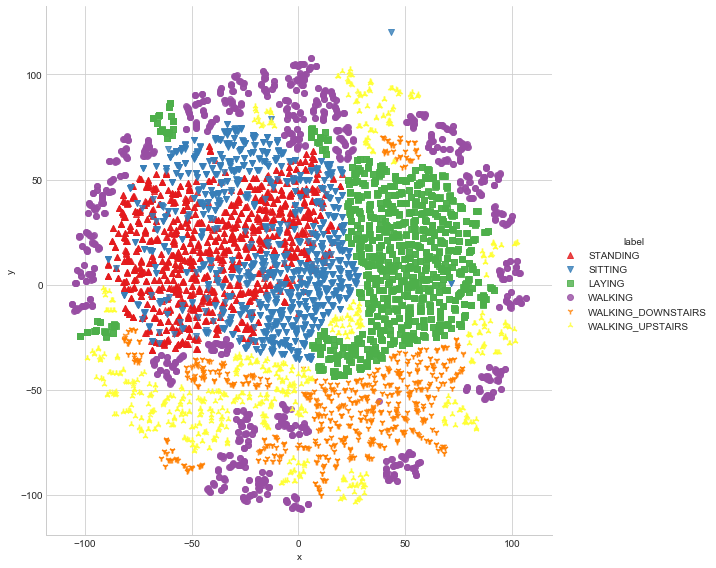

In [30]:
tsne( xtrTSNE, ytrTSNE, 2)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.238s...
[t-SNE] Computed neighbors for 7352 samples in 36.091s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.083s
[t-SNE] Iteration 50: error = 105.5929337, gradient norm = 0.0230214 (50 iterations in 11.711s)
[t-SNE] Iteration 100: error = 90.2810135, gradient norm = 0.0103665 (50 iterations in 7.304s)
[t-SNE] Iteration 150: error = 87.3523026, gradient norm 

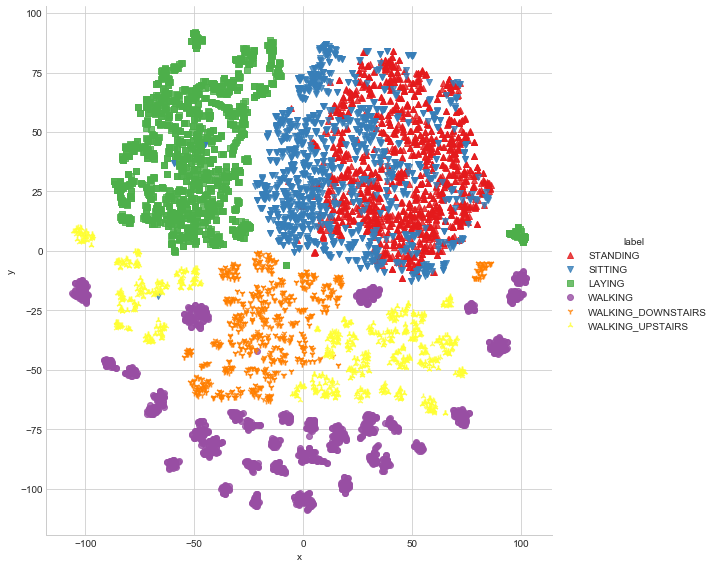

In [31]:
tsne( xtrTSNE, ytrTSNE, 10 )

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.239s...
[t-SNE] Computed neighbors for 7352 samples in 36.935s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.163s
[t-SNE] Iteration 50: error = 97.9406662, gradient norm = 0.0123723 (50 iterations in 9.638s)
[t-SNE] Iteration 100: error = 84.1287613, gradient norm = 0.0123051 (50 iterations in 7.829s)
[t-SNE] Iteration 150: error = 81.9478836, gradient norm = 

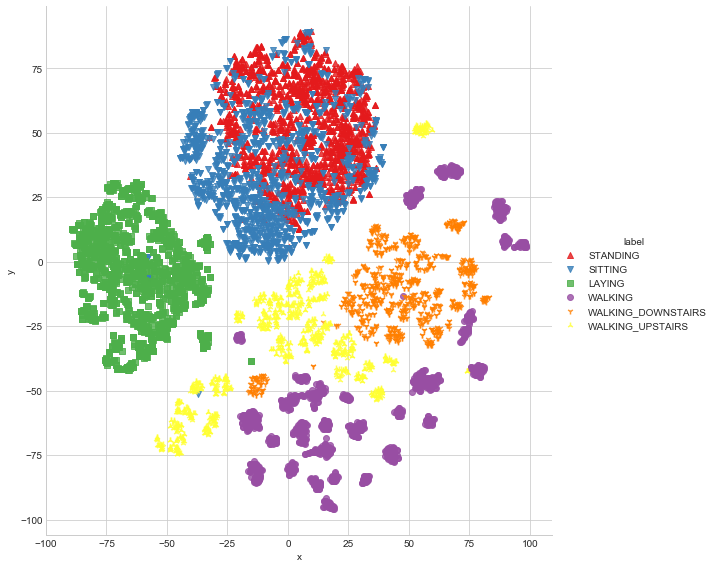

In [32]:
tsne( xtrTSNE, ytrTSNE, 20)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.230s...
[t-SNE] Computed neighbors for 7352 samples in 42.061s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.404s
[t-SNE] Iteration 50: error = 85.7307129, gradient norm = 0.0270633 (50 iterations in 14.434s)
[t-SNE] Iteration 100: error = 75.4313507, gradient norm = 0.0039965 (50 iterations in 12.124s)
[t-SNE] Iteration 150: error = 74.5748825, gradient norm

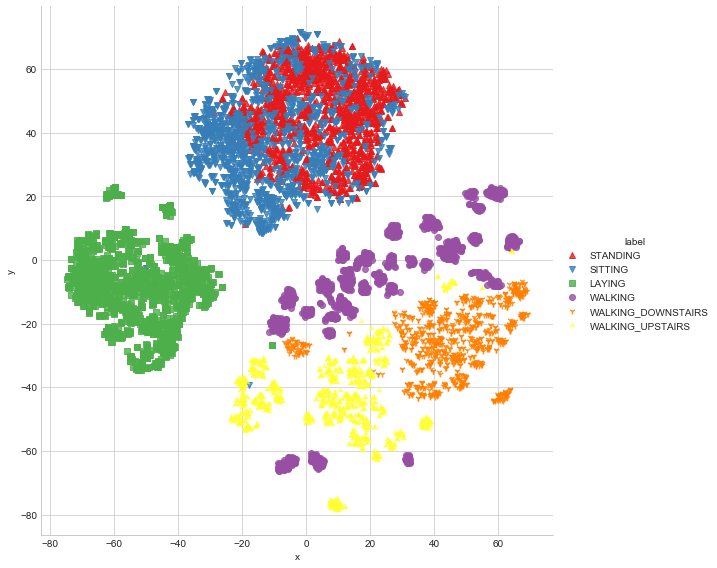

In [33]:
tsne( xtrTSNE, ytrTSNE, 50)

We can see from the above T-SNE plots that all our Activities are somewhat seperable

Laying is clearly standing out also Walking, Walking Upstairs, Walking Downstairs are also seperable with some error

The biggest Challenge is to seperate Sitting and Standing as they overalp each other in all T-SNE plots

## Applying ML models

In [26]:
# Getting Train and Test Data

ytr = xtr.ActivityName
xtr = xtr.drop( ['subject', 'Activity', 'ActivityName'], axis=1 )

yte = xte.ActivityName
xte = xte.drop( ['subject', 'Activity', 'ActivityName'], axis=1 )

In [27]:
print(xtr.shape, ' ', ytr.shape)
print(xte.shape, ' ', yte.shape)

(7352, 561)   (7352,)
(2947, 561)   (2947,)


In [28]:
labels = [ 'Laying', 'Sitting', 'Standing', 'Walking', 'WalkingDownstairs', 'WalkingUpstairs' ]

In [29]:
# Function to plot Confusion Matrix

from sklearn.metrics import confusion_matrix

def cm( data ):
    
    plt.figure( figsize = (12,6) )
    
    sns.heatmap( data, annot = True, fmt=".1f", annot_kws={"size": 18}, xticklabels=labels, yticklabels=labels, cmap='Blues_r')
    plt.xticks( rotation=90, size=15 )
    plt.yticks( size=15 )
    plt.ylabel('True label', size=18)
    plt.xlabel('Predicted label', size=18)
    plt.show()
    
    plt.close()
    print( data )

In [30]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.preprocessing import normalize

import warnings  # removes warning messages from the output

warnings.filterwarnings("ignore")

## Logistic Regression

### Hyperparameter Tuning then applying the model with best parameter

In [46]:
from sklearn.linear_model import SGDClassifier

alpha = [ 10 ** x for x in range(-7, 3) ]
penalty = ["l2", "l1"]

for i in alpha :
    for j in penalty:
    
        classifier = SGDClassifier( alpha = i, penalty=j, loss='log', random_state=42)
        classifier.fit(xtr, ytr)

        predictY_ = classifier.predict( xte )

        
        # ClaibratedClassifierCV() : Probability calibration with isotonic regression or sigmoid.
        # With this class, the base_estimator is fit on the train set of the cross-validation generator and the ......
        # .... test set is used for calibration. The probabilities for each of the folds are then averaged for prediction

        clf = CalibratedClassifierCV( classifier, method="sigmoid" )

        # base_estimator : (classifier) The classifier whose output decision func needs to be calibrated to offer more accurate...
        # .... predict_proba outputs. If cv=prefit, the classifier must have been fit already on data.

        clf.fit(xtr, ytr)
        predictY = clf.predict_proba( xte )


        print('For values of alpha = ', i, " and penalty = ", j, end =' ' )
        print(' the log loss is : ', np.round( log_loss(yte, predictY, labels=clf.classes_), 8 ), end='')
        print(' and accuracy is : ', np.round( accuracy_score( y_true=yte, y_pred=predictY_ ), 8 ) )    

For values of alpha =  1e-07  and penalty =  l2  the log loss is :  0.16240473 and accuracy is :  0.88632508
For values of alpha =  1e-07  and penalty =  l1  the log loss is :  0.16547491 and accuracy is :  0.90532745
For values of alpha =  1e-06  and penalty =  l2  the log loss is :  0.16669633 and accuracy is :  0.94401086
For values of alpha =  1e-06  and penalty =  l1  the log loss is :  0.16240418 and accuracy is :  0.93145572
For values of alpha =  1e-05  and penalty =  l2  the log loss is :  0.16644897 and accuracy is :  0.93450967
For values of alpha =  1e-05  and penalty =  l1  the log loss is :  0.1579616 and accuracy is :  0.94638616
For values of alpha =  0.0001  and penalty =  l2  the log loss is :  0.16733931 and accuracy is :  0.94502884
For values of alpha =  0.0001  and penalty =  l1  the log loss is :  0.17943596 and accuracy is :  0.93824228
For values of alpha =  0.001  and penalty =  l2  the log loss is :  0.16623025 and accuracy is :  0.90091619
For values of alph

 The Train accuracy is :  0.97646899   The Test accuracy is :  0.94638616


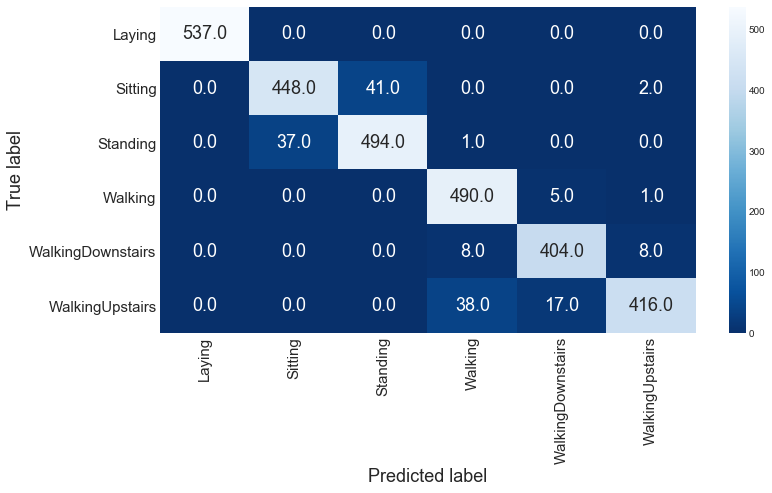

[[537   0   0   0   0   0]
 [  0 448  41   0   0   2]
 [  0  37 494   1   0   0]
 [  0   0   0 490   5   1]
 [  0   0   0   8 404   8]
 [  0   0   0  38  17 416]]


In [47]:
bestA = 10**-5
bestP = "l1"

classifier = SGDClassifier( alpha = bestA, penalty = bestP, loss='log', random_state=42)
classifier.fit(xtr, ytr)

pyte = classifier.predict( xte )

pytr = classifier.predict( xtr )

print(' The Train accuracy is : ', np.round( accuracy_score(ytr, pytr ), 8 ), end ='  ' )    
print(' The Test accuracy is : ', np.round( accuracy_score(yte, pyte ), 8 ) )    

cmte = confusion_matrix( yte, pyte )
cm( cmte )


## Linear SVC

### Hyperparameter Tuning then applying the model with best Parameter

In [41]:
from sklearn.svm import LinearSVC

c = [ 0.01, 0.125, 0.5, 1, 5, 10, 15, 20  ]

for i in c :
    
    classifier = LinearSVC( C = i, random_state=42)
    classifier.fit(xtr, ytr)

    predictY_ = classifier.predict( xte )
    
    clf = CalibratedClassifierCV( classifier, method="sigmoid" )
    clf.fit(xtr, ytr)

    predictY = clf.predict_proba( xte )

    print('For values of c = ', i, end =' ' )
    print(' the log loss is : ', np.round( log_loss(yte, predictY, labels=clf.classes_), 8 ), end='')
    print(' and accuracy is : ', np.round( accuracy_score( y_true=yte, y_pred=predictY_ ), 8 ) )    

For values of c =  0.01  the log loss is :  0.16205289 and accuracy is :  0.96029861
For values of c =  0.125  the log loss is :  0.16049914 and accuracy is :  0.96335256
For values of c =  0.5  the log loss is :  0.16226034 and accuracy is :  0.96674584
For values of c =  1  the log loss is :  0.1633771 and accuracy is :  0.96606719
For values of c =  5  the log loss is :  0.16617647 and accuracy is :  0.96640652
For values of c =  10  the log loss is :  0.16660953 and accuracy is :  0.96606719
For values of c =  15  the log loss is :  0.16651738 and accuracy is :  0.96912114
For values of c =  20  the log loss is :  0.16704692 and accuracy is :  0.95181541


 The Train accuracy is :  0.99292709   The Test accuracy is :  0.96912114


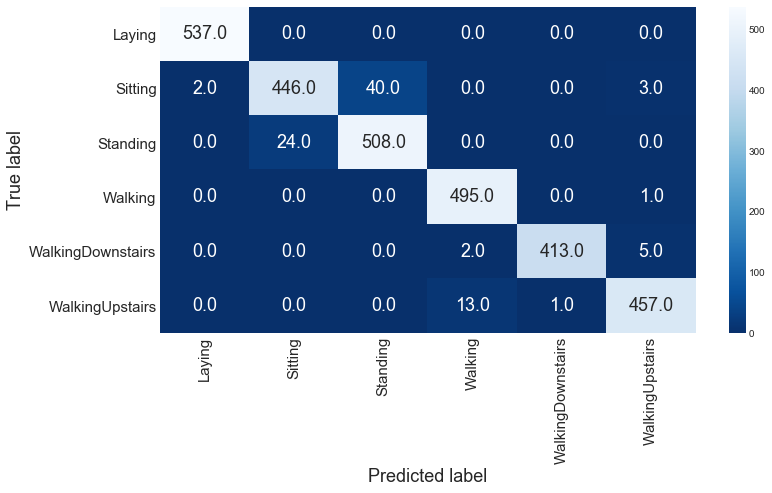

[[537   0   0   0   0   0]
 [  2 446  40   0   0   3]
 [  0  24 508   0   0   0]
 [  0   0   0 495   0   1]
 [  0   0   0   2 413   5]
 [  0   0   0  13   1 457]]


In [42]:
bestC = 15

classifier = LinearSVC( C = bestC, random_state=42)
classifier.fit( xtr, ytr )

pyte = classifier.predict( xte )
pytr = classifier.predict( xtr )

print(' The Train accuracy is : ', np.round( accuracy_score(ytr, pytr ), 8 ), end ='  ' )    
print(' The Test accuracy is : ', np.round( accuracy_score(yte, pyte ), 8 ) )    

cmte = confusion_matrix( yte, pyte )
cm( cmte )

## Decision Tree

### Hyperparameter Tuning then applying the model with best Parameter

In [43]:
from sklearn.tree import DecisionTreeClassifier

depth = [ 1, 5, 10, 50, 100, 500 ] 
split = [5, 10, 100, 500]


for i in depth :
    for j in split:
    
        classifier = DecisionTreeClassifier( max_depth = i, min_samples_split = j )
        classifier.fit(xtr, ytr)

        predictY_ = classifier.predict( xte )
        
        clf = CalibratedClassifierCV( classifier, method="sigmoid" )
        clf.fit(xtr, ytr)
        
        predictY = clf.predict_proba( xte )


        print('For values of depth = ', i, " and split = ", j, end =' ' )
        print(' the log loss is : ', np.round( log_loss(yte, predictY, labels=clf.classes_), 8 ), end='')
        print(' and accuracy is : ', np.round( accuracy_score( y_true=yte, y_pred=predictY_ ), 8 ) )    

For values of depth =  1  and split =  5  the log loss is :  1.31967858 and accuracy is :  0.36274177
For values of depth =  1  and split =  10  the log loss is :  1.31797587 and accuracy is :  0.36274177
For values of depth =  1  and split =  100  the log loss is :  1.31967858 and accuracy is :  0.36274177
For values of depth =  1  and split =  500  the log loss is :  1.31756267 and accuracy is :  0.36274177
For values of depth =  5  and split =  5  the log loss is :  0.4780469 and accuracy is :  0.83847981
For values of depth =  5  and split =  10  the log loss is :  0.47354931 and accuracy is :  0.83814048
For values of depth =  5  and split =  100  the log loss is :  0.47482867 and accuracy is :  0.83678317
For values of depth =  5  and split =  500  the log loss is :  0.47657198 and accuracy is :  0.83678317
For values of depth =  10  and split =  5  the log loss is :  0.45880357 and accuracy is :  0.8649474
For values of depth =  10  and split =  10  the log loss is :  0.4586565 

 The Train accuracy is :  0.98884657   The Test accuracy is :  0.86901934


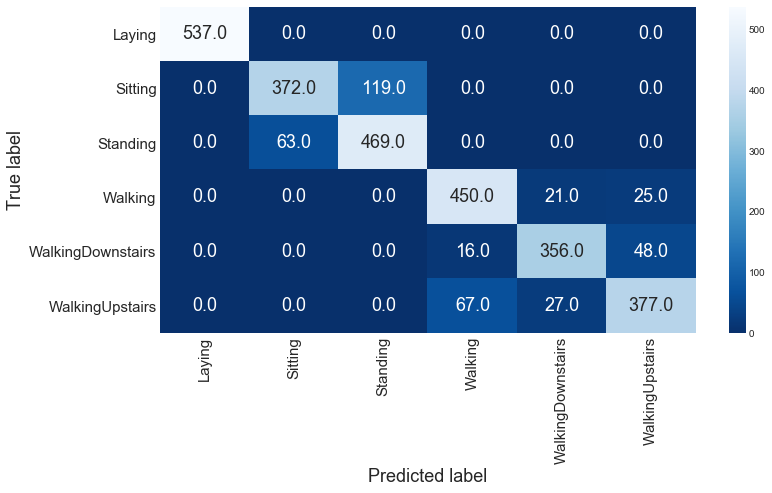

[[537   0   0   0   0   0]
 [  0 372 119   0   0   0]
 [  0  63 469   0   0   0]
 [  0   0   0 450  21  25]
 [  0   0   0  16 356  48]
 [  0   0   0  67  27 377]]


In [44]:
bestD = 10
bestS = 10

classifier = DecisionTreeClassifier( max_depth = bestD, min_samples_split = bestS )
classifier.fit( xtr, ytr )

pyte = classifier.predict( xte )
pytr = classifier.predict( xtr )

print(' The Train accuracy is : ', np.round( accuracy_score(ytr, pytr ), 8 ), end ='  ' )    
print(' The Test accuracy is : ', np.round( accuracy_score(yte, pyte ), 8 ) )    

cmte = confusion_matrix( yte, pyte )
cm( cmte )

## Random Forest

### Hyperparameter Tuning then applying the model with best Parameter

In [35]:
from sklearn.ensemble import RandomForestClassifier

estimator = [ 100, 200, 300, 500,1000] 
depth = [2, 5, 10, 15, 25, 50]

logError = [ ]

for i in depth :
    for j in estimator:
        
        classifier = RandomForestClassifier(n_estimators=j, criterion='gini', max_depth=i, random_state=42, n_jobs=-1)
        classifier.fit(xtr, ytr)
        
        predictY_ = classifier.predict( xte )

        
        clf = CalibratedClassifierCV( classifier, method="sigmoid" )
        clf.fit(xtr, ytr)

        predictY = clf.predict_proba( xte )

        print('For values of depth = ', i, " and estimator = ", j, end =' ' )
        print(' the log loss is : ', np.round( log_loss(yte, predictY, labels=clf.classes_), 8 ), end='')
        print(' and accuracy is : ', np.round( accuracy_score( y_true=yte, y_pred=predictY_ ), 8 ) )    

For values of depth =  2  and estimator =  100  the log loss is :  0.47419774 and accuracy is :  0.82558534
For values of depth =  2  and estimator =  200  the log loss is :  0.47988135 and accuracy is :  0.81845945
For values of depth =  2  and estimator =  300  the log loss is :  0.47096231 and accuracy is :  0.81845945
For values of depth =  2  and estimator =  500  the log loss is :  0.45691254 and accuracy is :  0.83135392
For values of depth =  2  and estimator =  1000  the log loss is :  0.46333178 and accuracy is :  0.83101459
For values of depth =  5  and estimator =  100  the log loss is :  0.26995683 and accuracy is :  0.9022735
For values of depth =  5  and estimator =  200  the log loss is :  0.26715994 and accuracy is :  0.89684425
For values of depth =  5  and estimator =  300  the log loss is :  0.26692749 and accuracy is :  0.89854089
For values of depth =  5  and estimator =  500  the log loss is :  0.27055636 and accuracy is :  0.89446895
For values of depth =  5  an

 The Train accuracy is :  1.0   The Test accuracy is :  0.92975908


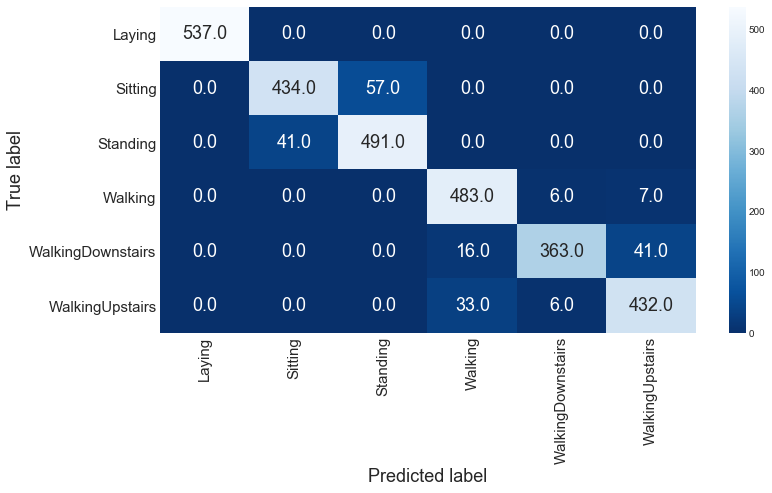

[[537   0   0   0   0   0]
 [  0 434  57   0   0   0]
 [  0  41 491   0   0   0]
 [  0   0   0 483   6   7]
 [  0   0   0  16 363  41]
 [  0   0   0  33   6 432]]


In [57]:
bestD = 50
bestE = 200

classifier = RandomForestClassifier(n_estimators=bestE, criterion='gini', max_depth=bestD, random_state=42, n_jobs=-1)
classifier.fit( xtr, ytr )

pyte = classifier.predict( xte )
pytr = classifier.predict( xtr )

print(' The Train accuracy is : ', np.round( accuracy_score(ytr, pytr ), 8 ), end ='  ' )    
print(' The Test accuracy is : ', np.round( accuracy_score(yte, pyte ), 8 ) )    

cmte = confusion_matrix( yte, pyte )
cm( cmte )

Confusion matrix for Train dataset on Random Forest  


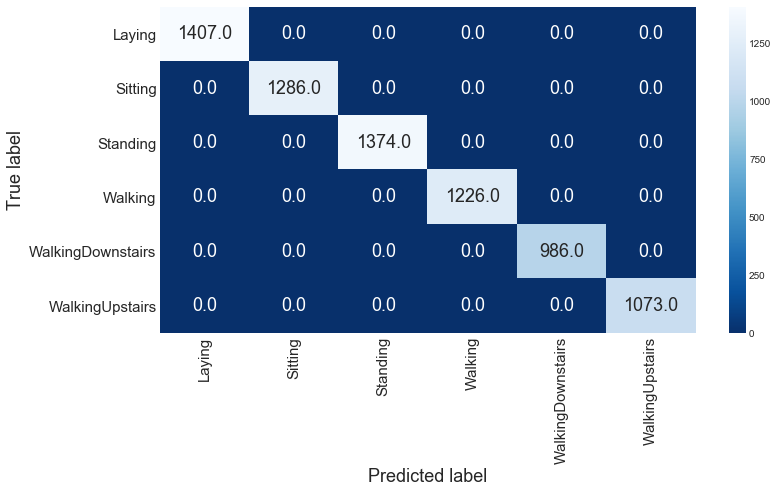

[[1407    0    0    0    0    0]
 [   0 1286    0    0    0    0]
 [   0    0 1374    0    0    0]
 [   0    0    0 1226    0    0]
 [   0    0    0    0  986    0]
 [   0    0    0    0    0 1073]]


In [63]:
print("Confusion matrix for Train dataset on Random Forest  ")
cmtr = confusion_matrix( ytr, pytr )
cm( cmtr )

In [61]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = [ " Model ", " Test Accuracy ", " Test log loss ", " Train Accuracy ",  ]

x.add_row( [ " Logistic Regression ", " 94.63 % ", " 0.1579 ", " 97.64 % " ] )
x.add_row( [ " Linear SVC ", " 96.91 % ", " 0.1665 ", " 99.29 % " ] )
x.add_row( [ " Decision Tree ", " 86.90 % ", "  0.4586 ", " 98.88 % " ] )
x.add_row( [ " Random Forest ", " 92.97 % ", "  0.2074 ", " 100 % " ] )


print("\n\t Models and their Corresponding accuracy and log loss  \n ")
print( x )

# Ref : http://zetcode.com/python/prettytable/


	 Models and their Corresponding accuracy and log loss  
 
+-----------------------+-----------------+-----------------+------------------+
|         Model         |  Test Accuracy  |  Test log loss  |  Train Accuracy  |
+-----------------------+-----------------+-----------------+------------------+
|  Logistic Regression  |     94.63 %     |      0.1579     |     97.64 %      |
|       Linear SVC      |     96.91 %     |      0.1665     |     99.29 %      |
|     Decision Tree     |     86.90 %     |      0.4586     |     98.88 %      |
|     Random Forest     |     92.97 %     |      0.2074     |      100 %       |
+-----------------------+-----------------+-----------------+------------------+


This notebook is continued in Human Activity Recognition DL